In [14]:
import nltk
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('omw-1.4')
#nltk.download('averaged_perceptron_tagger')
import matplotlib.pyplot as plt
import pandas as pd
import re
from wordcloud import WordCloud

subreddit = 'science'
filename = f'{subreddit}_comments.csv'
stop = nltk.corpus.stopwords.words('english')
tokenizer = nltk.RegexpTokenizer(r"\w+")
lemmatizer = nltk.WordNetLemmatizer()

dataframe = pd.read_csv(filename, compression='gzip')
dataframe.head()

,all_awardings,archived,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,top_awarded_type,total_awards_received,treatment_tags,unrepliable_reason,author_cakeday
0,[],False,NaN,TheRealIosefka,NaN,NaN,[],NaN,NaN,NaN,...,False,science,t5_mouw,r/science,public,NaN,0,[],NaN,NaN
1,[],False,NaN,RabbaJabba,NaN,NaN,[],NaN,NaN,NaN,...,False,science,t5_mouw,r/science,public,NaN,0,[],NaN,NaN
2,[],False,NaN,winpowguy,NaN,NaN,[],NaN,NaN,NaN,...,False,science,t5_mouw,r/science,public,NaN,0,[],NaN,NaN
3,[],False,NaN,Catctus,NaN,NaN,[],NaN,NaN,NaN,...,False,science,t5_mouw,r/science,public,NaN,0,[],NaN,NaN
4,[],False,NaN,[deleted],NaN,NaN,NaN,NaN,NaN,dark,...,False,science,t5_mouw,r/science,public,NaN,0,[],NaN,NaN


In [15]:
dataframe.shape

(1000, 48)

In [18]:
comments = dataframe["body"]

wordcloud_text = ' '
for comment in comments:
    comment = comment.lower()
    comment = re.sub(r"(@\[A-Za-z0-9]+)|(\w+:\/\/\S+)|^rt|http.+?","",comment)
    comment = re.sub(r"meta sticky commentrule 2 does not apply when replying to this stickied comment  rule 2 does apply throughout the rest of this threadwhat this means please keep any meta discussion directed at specific users mods or rconspiracy in general in this comment chain onlyi am a bot and this action was performed automatically please contact the moderators of this subredditmessagecomposetorconspiracy if you have any questions or concerns", "", comment)
    comment = re.sub(r"removed", "", comment)
    #maybe first lemmatize??
    comment = " ".join(word for word in comment.split() if word not in stop)
    comment = tokenizer.tokenize(comment)
    comment = [lemmatizer.lemmatize(word, pos="v") for word in comment]
    pos = nltk.pos_tag(comment)
    for word in pos:
        if word[1] == 'NN':
            wordcloud_text = wordcloud_text + word[0] + ' '

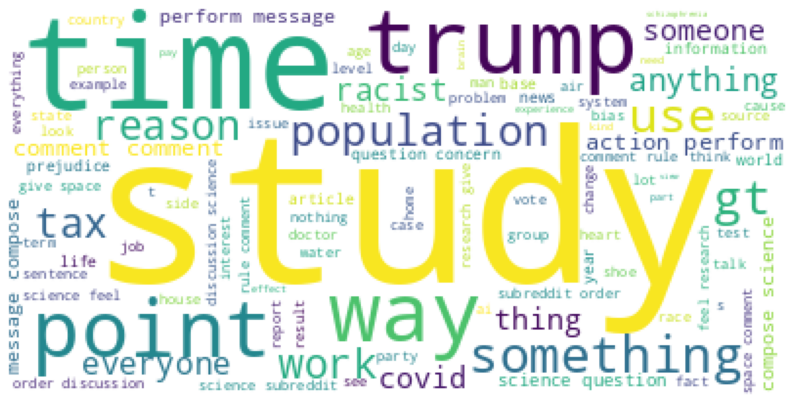

In [19]:
wc = WordCloud(max_words=100, background_color='white').generate(wordcloud_text)
plt.figure(figsize = (14, 14))
plt.axis("off")
plt.imshow(wc)
plt.savefig(f'{subreddit}_wordcloud.png')

* https://github.com/britt-allen/classifying_reddit_posts/blob/master/notebooks/project_3_data_cleaning_and_eda.ipynb
* monkeylearn.com/blog/text_cleaning
